In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing


In [2]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = '4OTsOJiu1cERVuuqOAvg9LWbi'
CONSUMER_SECRET = 'EDs9p10sLdpDSRpvJCFaoHcyAHEL0tNjNszfTyJT1EW4eOQrUv'

# Access:
ACCESS_TOKEN  = '781242136989667328-aGIQ2JePB0zH2ihHgXGBWDUveVTag0W'
ACCESS_SECRET = 'jJGPzyFryGTDrMyfxSnCRBsfgJvv64pkQCG1R5LwjZTay'

In [122]:
# We import our access keys:
# from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api                                                         

In [352]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="XHNews", lang="en", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Lion dance, magical mask-changing, Tai Chi, Chinese calligraphy...
Thousands flock to Huntington Library, Art Colle… https://t.co/4bDf36NmP3

Festivities continue in Canada.
2018 Lunar Fest held in Ontario, Canada, to celebrate Chinese #LunarNewYear, Year o… https://t.co/iK4FOib4Pk

RT @XHSports: China is still 19th on medals table. The disqualification against China in short track 3,000m relay possibly denies the count…

Pro-gov't Syrian forces start moving toward Kurdish-controlled Afrin https://t.co/wpa2Px4Ujm https://t.co/3pEwHM2pvo

#Palestinian President #Abbas to ask UN Security Council to implement two-state solution to Palestinian-Israeli con… https://t.co/l3JKFo4k3o



In [353]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(15))

,Tweets
0,"Lion dance, magical mask-changing, Tai Chi, Ch..."
1,Festivities continue in Canada.\n2018 Lunar Fe...
2,RT @XHSports: China is still 19th on medals ta...
3,Pro-gov't Syrian forces start moving toward Ku...
4,#Palestinian President #Abbas to ask UN Securi...
5,"Peter Wang,\n15-year-old,\nChinese American,\n..."
6,Plastic particles found in 73 pct of deep ocea...
7,"RT @XHSports: China was disqualified, South Ko..."
8,"Symbolizing good fortune, red lanterns bring w..."
9,Russia fines some hotels in Moscow for hiking ...


In [354]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [355]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

965985738901815297
2018-02-20 16:25:21
SocialFlow
76
11
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4bDf36NmP3', 'expanded_url': 'https://twitter.com/i/web/status/965985738901815297', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


In [356]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [357]:
# Display of first 10 elements from dataframe:
display(data.head(15))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"Lion dance, magical mask-changing, Tai Chi, Ch...",140,965985738901815297,2018-02-20 16:25:21,SocialFlow,76,11
1,Festivities continue in Canada.\n2018 Lunar Fe...,140,965975073252311042,2018-02-20 15:42:59,SocialFlow,61,12
2,RT @XHSports: China is still 19th on medals ta...,140,965973493610291201,2018-02-20 15:36:42,Twitter Web Client,0,5
3,Pro-gov't Syrian forces start moving toward Ku...,116,965973364241240071,2018-02-20 15:36:11,SocialFlow,53,18
4,#Palestinian President #Abbas to ask UN Securi...,140,965970026393202688,2018-02-20 15:22:55,SocialFlow,59,7
5,"Peter Wang,\n15-year-old,\nChinese American,\n...",140,965960844436652033,2018-02-20 14:46:26,Twitter Web Client,160,50
6,Plastic particles found in 73 pct of deep ocea...,140,965960054393458688,2018-02-20 14:43:18,SocialFlow,66,30
7,"RT @XHSports: China was disqualified, South Ko...",140,965957978657505280,2018-02-20 14:35:03,Twitter Web Client,0,8
8,"Symbolizing good fortune, red lanterns bring w...",138,965956762582110209,2018-02-20 14:30:13,Twitter Web Client,74,12
9,Russia fines some hotels in Moscow for hiking ...,135,965954269517176832,2018-02-20 14:20:19,SocialFlow,89,19


In [358]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 130.96


In [359]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Stunning! A fleet of self-driving vehicles travel on world's longest sea bridge on #LunarNewYear's Eve, in celebrat… https://t.co/V0XhGG8ePb
Number of likes: 1728
140 characters.

The tweet with more retweets is: 
Stunning! A fleet of self-driving vehicles travel on world's longest sea bridge on #LunarNewYear's Eve, in celebrat… https://t.co/V0XhGG8ePb
Number of retweets: 820
140 characters.



In [360]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

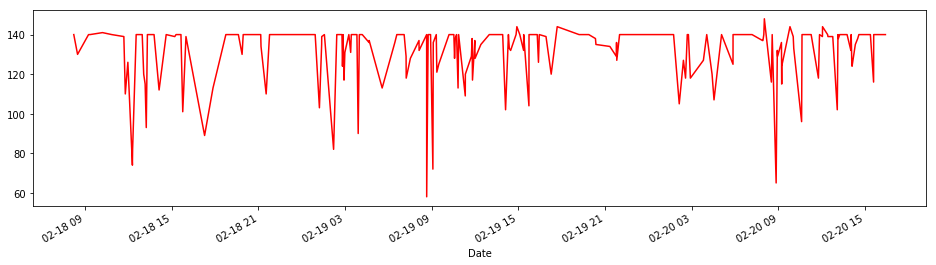

In [361]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

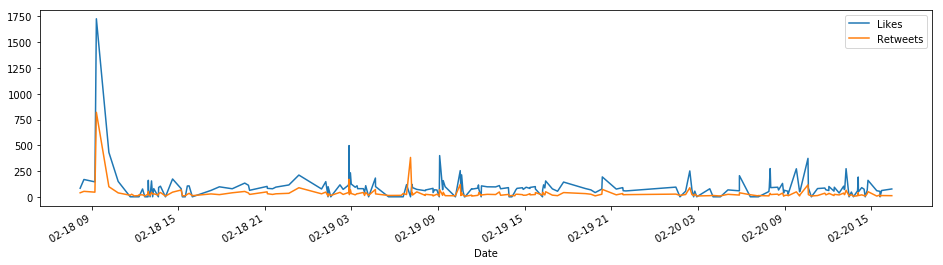

In [362]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [363]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* SocialFlow
* Twitter Web Client
* Xinhua News Agency
* Media Studio
* Periscope


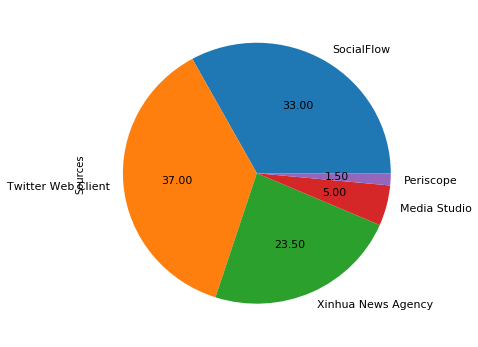

In [364]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [365]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [366]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"Lion dance, magical mask-changing, Tai Chi, Ch...",140,965985738901815297,2018-02-20 16:25:21,SocialFlow,76,11,1
1,Festivities continue in Canada.\n2018 Lunar Fe...,140,965975073252311042,2018-02-20 15:42:59,SocialFlow,61,12,0
2,RT @XHSports: China is still 19th on medals ta...,140,965973493610291201,2018-02-20 15:36:42,Twitter Web Client,0,5,0
3,Pro-gov't Syrian forces start moving toward Ku...,116,965973364241240071,2018-02-20 15:36:11,SocialFlow,53,18,0
4,#Palestinian President #Abbas to ask UN Securi...,140,965970026393202688,2018-02-20 15:22:55,SocialFlow,59,7,0
5,"Peter Wang,\n15-year-old,\nChinese American,\n...",140,965960844436652033,2018-02-20 14:46:26,Twitter Web Client,160,50,1
6,Plastic particles found in 73 pct of deep ocea...,140,965960054393458688,2018-02-20 14:43:18,SocialFlow,66,30,0
7,"RT @XHSports: China was disqualified, South Ko...",140,965957978657505280,2018-02-20 14:35:03,Twitter Web Client,0,8,1
8,"Symbolizing good fortune, red lanterns bring w...",138,965956762582110209,2018-02-20 14:30:13,Twitter Web Client,74,12,1
9,Russia fines some hotels in Moscow for hiking ...,135,965954269517176832,2018-02-20 14:20:19,SocialFlow,89,19,0


In [367]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [368]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 44.0%
Percentage of neutral tweets: 43.5%
Percentage de negative tweets: 12.5%
